# Пример реализации модуля

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import scipy.stats as scs

In [2]:
#импортируем библиотеку с нашими моделями(в этой библиотеке все наши расчеты. Файл называется module.py)
from module import Pipeline

# Первичный анализ датасета

In [3]:
#наш датасет
df = pd.read_excel('dataset.xlsx', index_col=[0], parse_dates=True)
df.index = pd.to_datetime(df.index, utc=True)

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Data', labels=[], dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    for idx, i, j, transp in zip(labels, x, y, [0.6, 0.7, 0.8]):
        plt.plot(i, j, label=idx, alpha=transp)

    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show() 

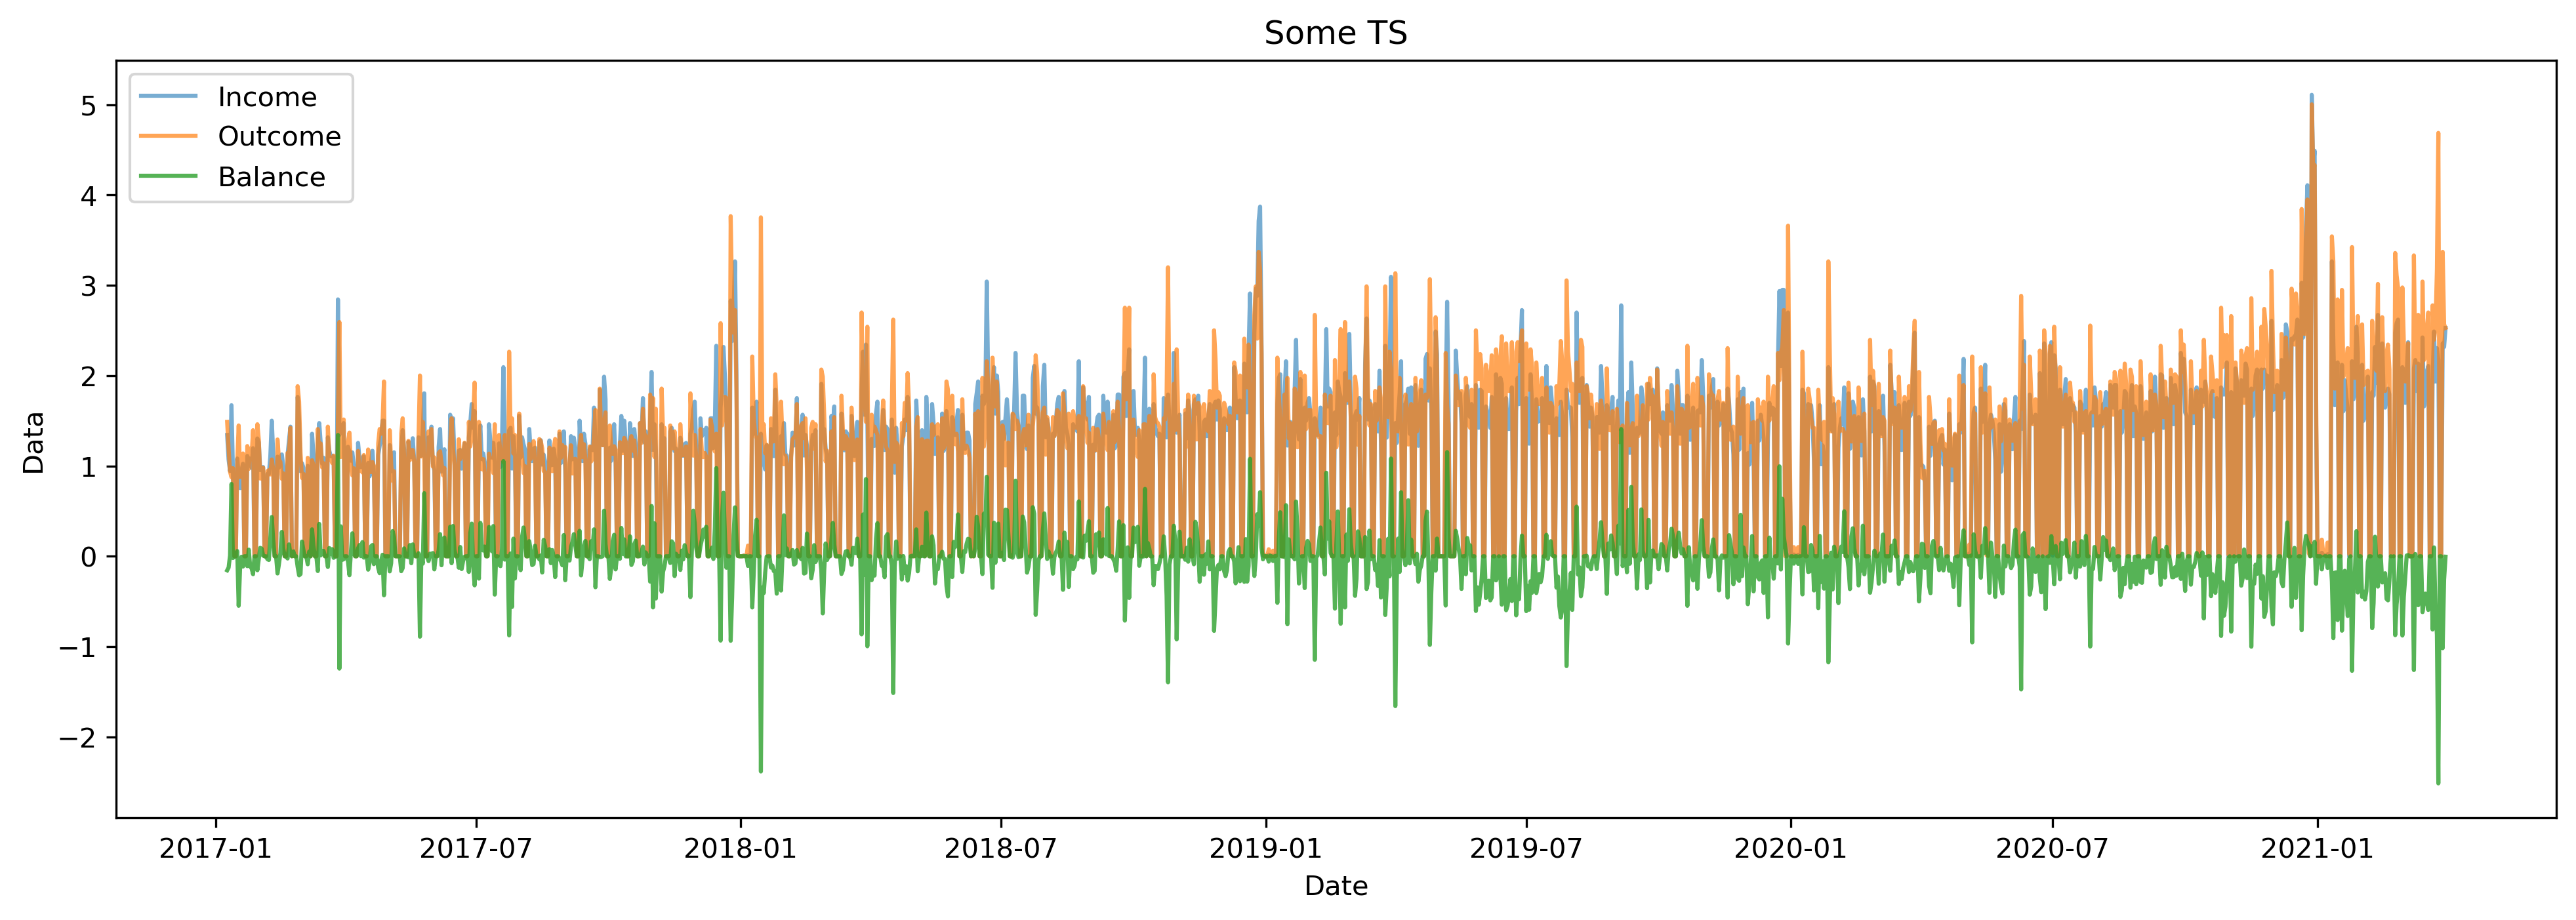

In [5]:
plot_df(df, x=[df.index] * 3, y=[df.Income, df.Outcome, df.Balance], title='Some TS', labels=['Income', 'Outcome', 'Balance'], dpi=300)

<Figure size 1500x1000 with 0 Axes>

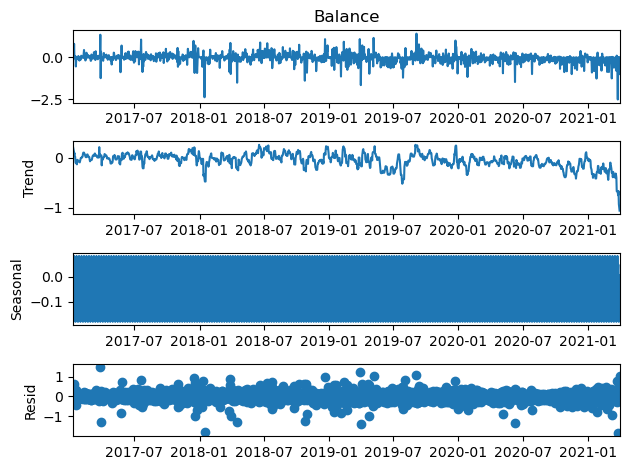

In [6]:
plt.figure(figsize=(15,10))
sm.tsa.seasonal_decompose(df.Balance, extrapolate_trend='freq').plot();

In [7]:
df_value = sm.tsa.stattools.adfuller(df.Balance)[1]
print("Критерий Дики-Фуллера: p=%f" % df_value)
if df_value < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

Критерий Дики-Фуллера: p=0.000918
Ряд стационарный


In [8]:
def tsplot(y, lags=None, figsize=(15, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        _ = plt.figure(figsize=figsize)
        
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

np.random.seed(1)

C:\Users\Spacelight\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


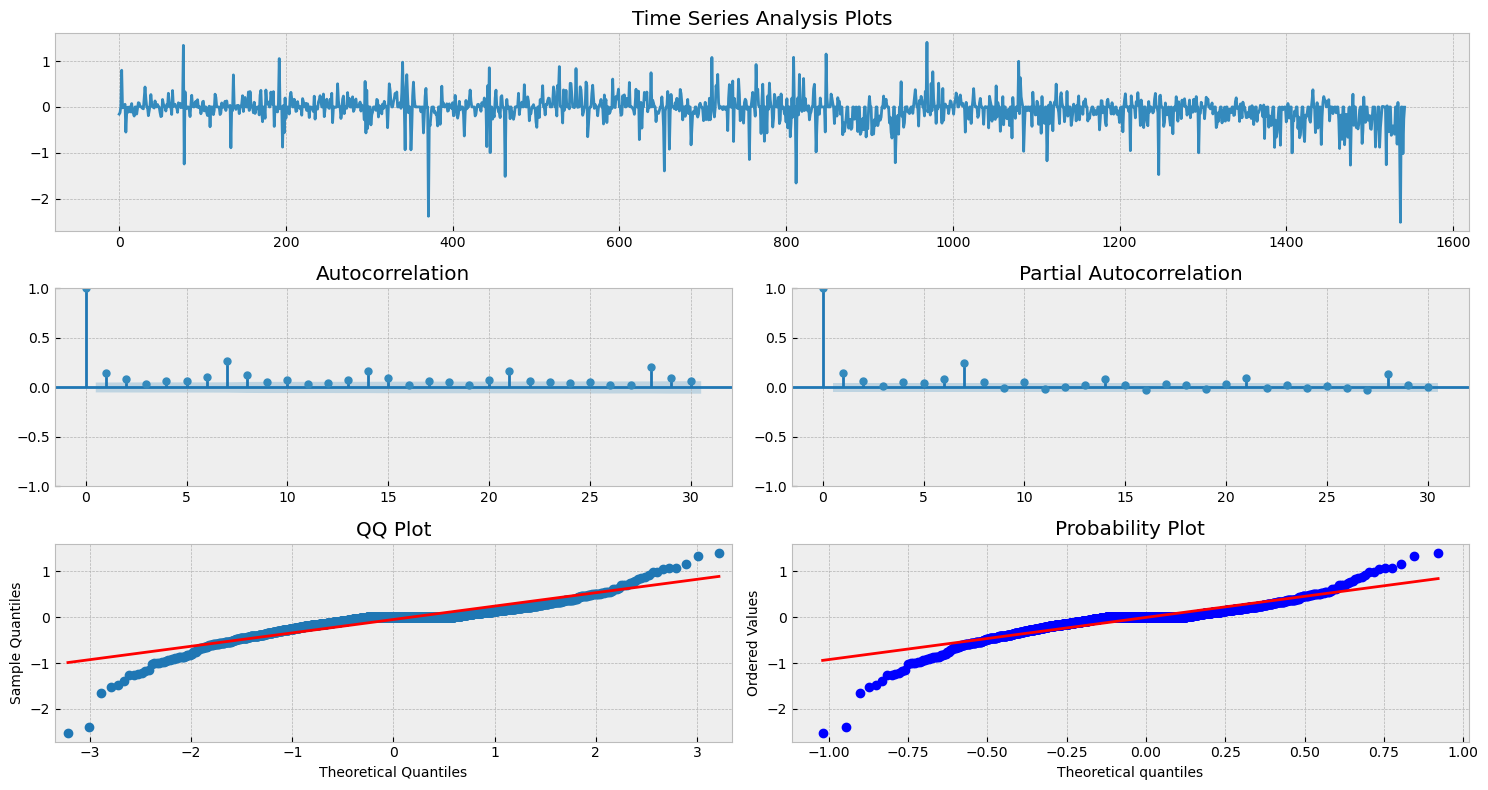

In [9]:
tsplot(df.Balance.values.squeeze(), lags=30)

C:\Users\Spacelight\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


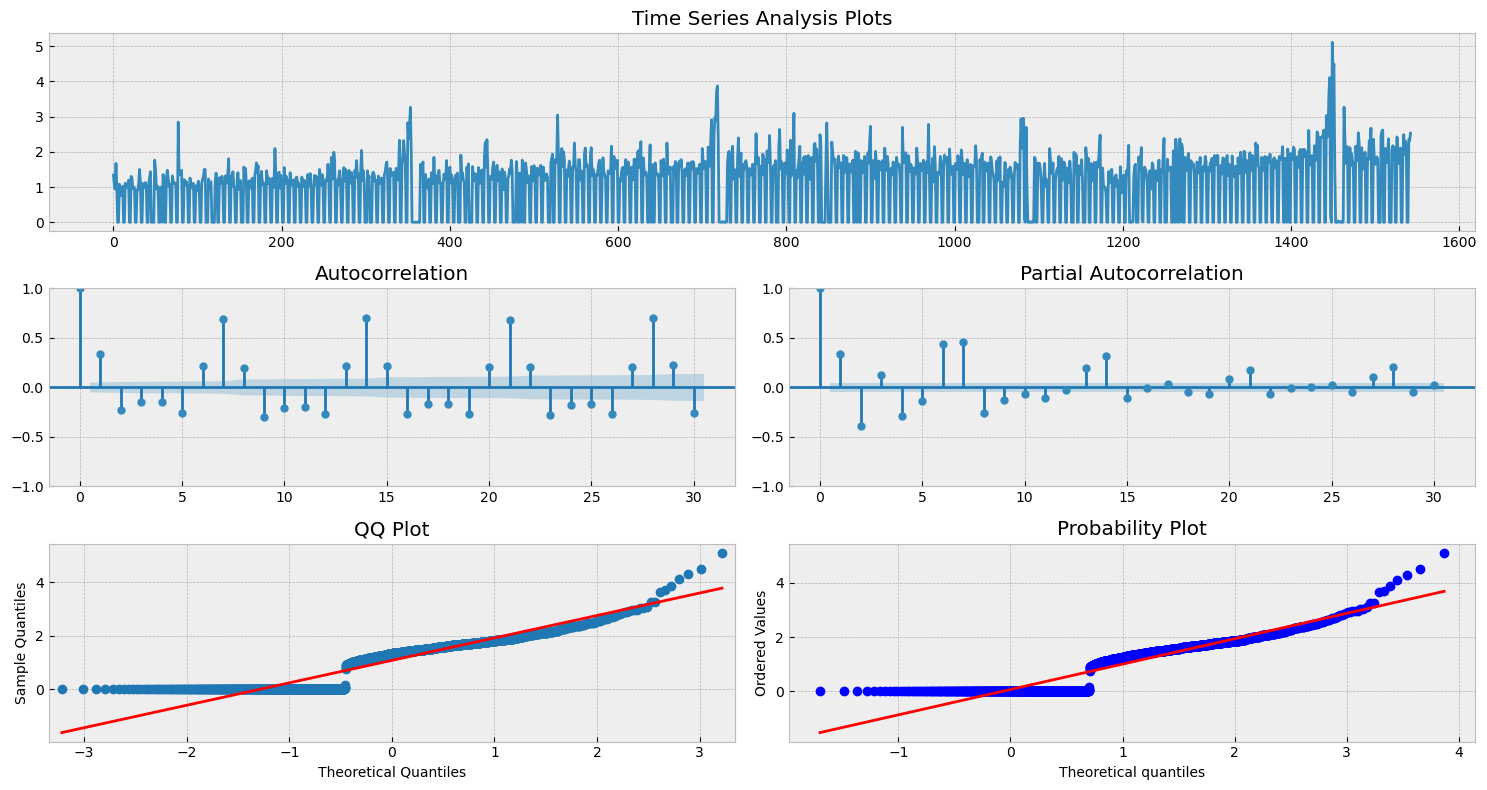

In [10]:
tsplot(df.Income.values.squeeze(), lags=30)

C:\Users\Spacelight\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


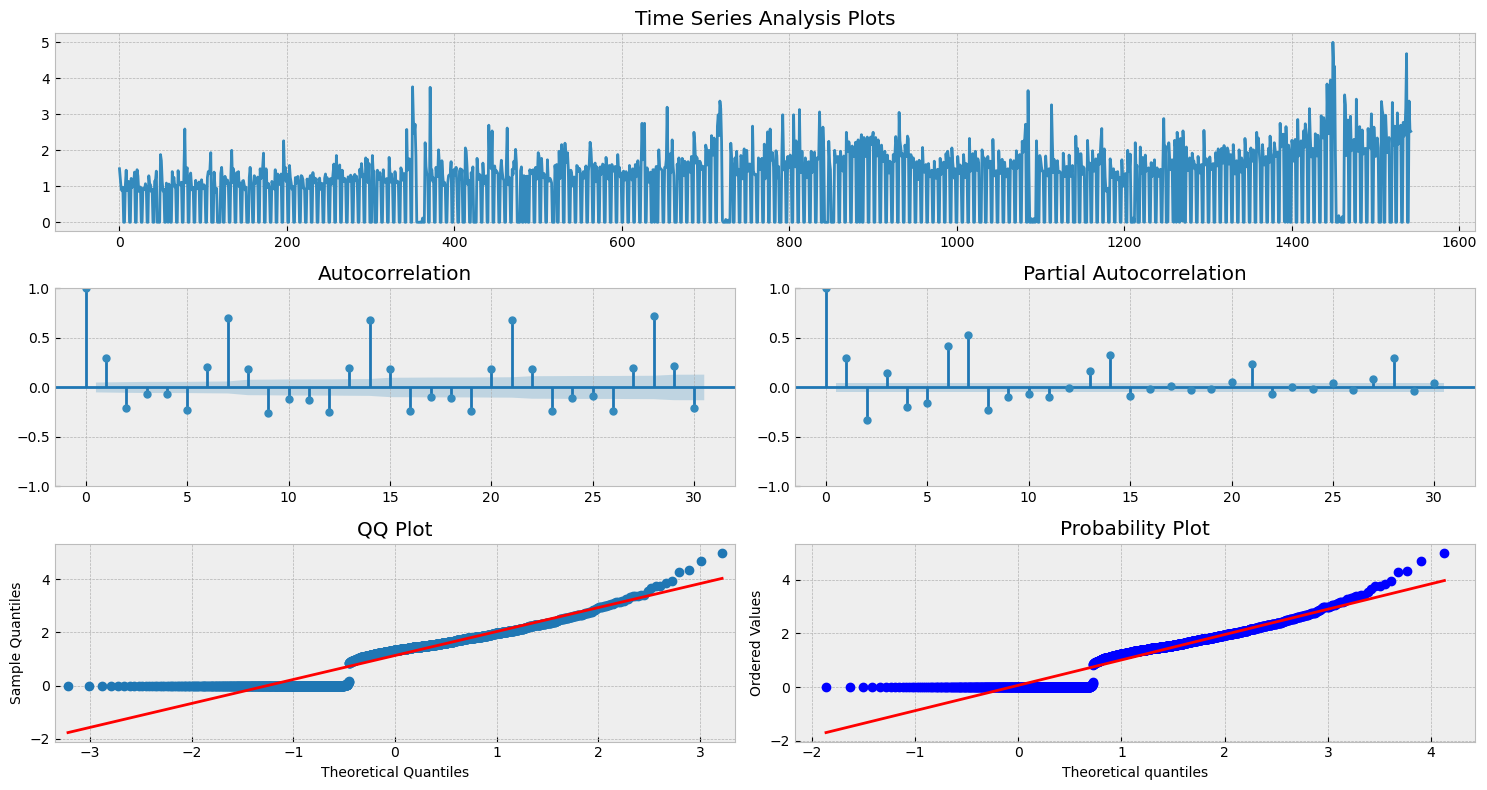

In [11]:
tsplot(df.Outcome.values.squeeze(), lags=30)

# Построение модели

In [12]:
df = pd.read_excel('dataset.xlsx', index_col=[0], parse_dates=True)

In [13]:
pipeline = Pipeline(df, 'Balance')

In [14]:
pipeline.data_process()

In [15]:
# datetime.strptime('2021-01-09', '%Y-%m-%d').date()
# pipeline.fit_model(first_test_date=datetime.strptime('2021-01-09', '%Y-%m-%d').date())
pipeline.fit_model('2021-01-09')

In [16]:
pipeline.predict_one_step('2021-01-09', is_fact = False)

{'Predict value': -0.01319775936202797,
 'Abs.Error': 'No fact data',
 'Is changepoint': 'No fact data',
 'Is anomaly': 'No fact data',
 'Last train date': '2021-01-08'}

In [17]:
pipeline.predict_one_step('2021-01-09', is_fact = True)

{'Predict value': -0.01319775936202797,
 'Abs.Error': 0.01319775936202797,
 'Is changepoint': False,
 'Is anomaly': False,
 'Last train date': '2021-01-08'}

In [18]:
pipeline.predict_one_step('2021-01-20')

{'Predict value': -0.12200298211217155,
 'Abs.Error': 0.03876228968607222,
 'Is changepoint': False,
 'Is anomaly': False,
 'Last train date': '2021-01-19'}

In [19]:
pipeline.predict_one_step('2021-01-21')

{'Predict value': -0.12211142722085391,
 'Abs.Error': 0.2641970804243422,
 'Is changepoint': False,
 'Is anomaly': False,
 'Last train date': '2021-01-19'}